In [ ]:
!pip install requests beautifulsoup4 pandas

!pip install ace_tools

!pip install nba_api


In [ ]:
import pandas as pd

# 파일 불러오기
file_path = "/content/nba (1).csv"
df = pd.read_csv(file_path)

df= df.dropna()
# 데이터 확인
print(df)


   Team                   Player    G1    G2    G3    G4    G5    G6    G7  \
0   NYK            Jalen Brunson  44.0  38.0  40.0  40.0  33.0  34.0  38.0   
1   NYK                Josh Hart  45.0  43.0  34.0  30.0  36.0  33.0  44.0   
2   NYK            Mikal Bridges  51.0  43.0  38.0  44.0  39.0  30.0  46.0   
3   NYK               OG Anunoby  46.0  38.0  31.0  40.0  36.0  37.0  42.0   
4   NYK       Karl-Anthony Towns  31.0  35.0  36.0  36.0  29.0  35.0  39.0   
5   IND        Tyrese Haliburton  42.0  36.0  36.0  30.0  26.0  36.0  42.0   
6   IND            Pascal Siakam  41.0  34.0  30.0  28.0  21.0  40.0  43.0   
7   IND             Myles Turner  43.0  33.0  35.0  26.0  21.0  33.0  31.0   
8   IND          Andrew Nembhard  37.0  37.0  36.0  25.0  30.0  37.0  35.0   
9   IND            Aaron Nesmith  40.0  25.0  33.0  27.0  22.0  37.0  38.0   
10  OKC  Shai Gilgeous-Alexander  45.0  38.0  39.0  35.0  36.0  38.0  42.0   
11  OKC           Jalen Williams  43.0  33.0  38.0  38.0  33.0  

최근 8경기를 바탕으로 주요 선수의 의존도 분석

In [ ]:
# 1. 경기별 팀 주요선수 출전시간 합산
team_game_minutes = df.copy()

# 각 경기 G1~G8 합산
games = ['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8']
team_game_minutes = team_game_minutes.groupby('Team')[games].sum()

# 2. 팀별 경기당 의존도 (%) = (주요 5인 합계 / 240) * 100
team_game_minutes_percent = team_game_minutes.applymap(lambda x: round(x / 240 * 100, 1))

# 병합해서 비교용 테이블 구성
team_minutes_combined = team_game_minutes.copy()
team_minutes_combined.columns = [f"{col} 출전시간" for col in team_minutes_combined.columns]
for g in games:
    team_minutes_combined[f"{g} 의존도(%)"] = team_game_minutes_percent[g]

team_minutes_combined.reset_index(inplace=True)
team_minutes_combined

<ipython-input-86-2da69de90d65>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  team_game_minutes_percent = team_game_minutes.applymap(lambda x: round(x / 240 * 100, 1))


,Team,G1 출전시간,G2 출전시간,G3 출전시간,G4 출전시간,G5 출전시간,G6 출전시간,G7 출전시간,G8 출전시간,G1 의존도(%),G2 의존도(%),G3 의존도(%),G4 의존도(%),G5 의존도(%),G6 의존도(%),G7 의존도(%),G8 의존도(%)
0,IND,203.0,165.0,170.0,136.0,120.0,183.0,189.0,171.0,84.6,68.8,70.8,56.7,50.0,76.2,78.8,71.2
1,MIN,159.0,144.0,181.0,173.0,178.0,141.0,165.0,136.0,66.2,60.0,75.4,72.1,74.2,58.8,68.8,56.7
2,NYK,217.0,197.0,179.0,190.0,173.0,169.0,209.0,177.0,90.4,82.1,74.6,79.2,72.1,70.4,87.1,73.8
3,OKC,191.0,152.0,172.0,149.0,131.0,145.0,175.0,111.0,79.6,63.3,71.7,62.1,54.6,60.4,72.9,46.2


최근 8경기동안의 경기시간 변화

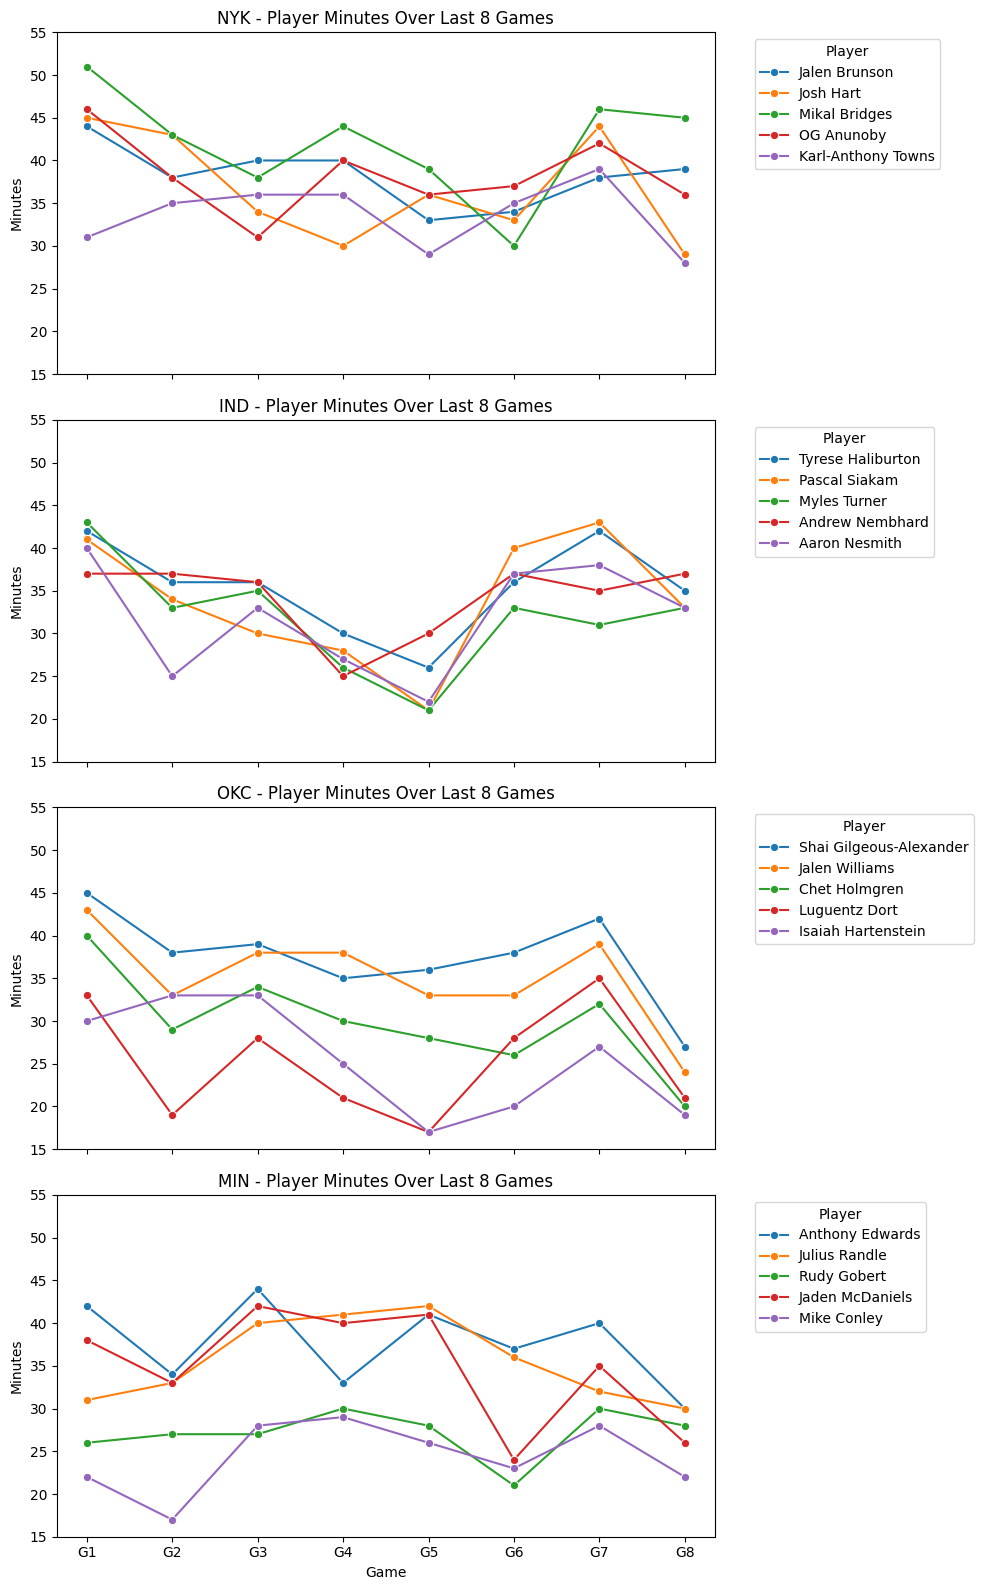

In [ ]:
# 데이터 Long 형식으로 변환
df_long = df.melt(id_vars=['Team', 'Player'], value_vars=[f'G{i}' for i in range(1, 9)],
                  var_name='Game', value_name='Minutes')

# 팀 리스트
teams = df['Team'].unique()
num_teams = len(teams)

# 선 그래프 생성
fig, axes = plt.subplots(nrows=num_teams, ncols=1, figsize=(10, 4 * num_teams), sharex=True)

if num_teams == 1:
    axes = [axes]

for i, team in enumerate(teams):
    ax = axes[i]
    team_data = df_long[df_long['Team'] == team]
    sns.lineplot(data=team_data, x='Game', y='Minutes', hue='Player', marker='o', ax=ax)
    ax.set_title(f"{team} - Player Minutes Over Last 8 Games")
    ax.set_ylim(15, 55)
    ax.set_ylabel("Minutes")
    ax.legend(title='Player', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
print(df_season)

   Team                   Player  2024-25 Season Avg Minutes
0   NYK            Jalen Brunson                        35.4
1   NYK                Josh Hart                        33.3
2   NYK            Mikal Bridges                        34.2
3   NYK               OG Anunoby                        31.5
4   NYK       Karl-Anthony Towns                        33.2
5   IND        Tyrese Haliburton                        32.8
6   IND            Pascal Siakam                        34.1
7   IND             Myles Turner                        30.7
8   IND          Andrew Nembhard                        26.5
9   IND            Aaron Nesmith                        27.4
10  OKC  Shai Gilgeous-Alexander                        34.6
11  OKC           Jalen Williams                        32.6
12  OKC            Chet Holmgren                        29.4
13  OKC            Luguentz Dort                        30.4
14  OKC       Isaiah Hartenstein                        25.1
15  MIN          Anthony

In [ ]:
import unicodedata

# 유니코드 공백 제거 + 양쪽 공백 제거
def clean(s):
    return unicodedata.normalize("NFKC", str(s)).strip()

df['Player'] = df_season['Player'].apply(clean)
df['Player'] = df_season['Player'].apply(clean)


In [ ]:
# 정규시즌 평균 데이터
file_season_avg = "/content/nba_2025_regular_season_avg_minutes.csv"
df_season = pd.read_csv(file_season_avg)

# 선수 이름 기준 병합
merged_df = pd.merge(df, df_season, on=['Team', 'Player'], how='left')

# 8경기 평균 출전시간 계산
games = ['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8']
merged_df['Recent Avg Minutes'] = merged_df[games].mean(axis=1).round(2)


# 차이 계산
merged_df['Δ Minutes'] = (merged_df['Recent Avg Minutes'] - merged_df['2024-25 Season Avg Minutes']).round(2)

# 주요 비교 컬럼 정리
final_df = merged_df[['Team', 'Player', 'Recent Avg Minutes', '2024-25 Season Avg Minutes', 'Δ Minutes']]

In [ ]:
print(final_df)

   Team                   Player  Recent Avg Minutes  \
0   NYK            Jalen Brunson               38.25   
1   NYK                Josh Hart               36.75   
2   NYK            Mikal Bridges               42.00   
3   NYK               OG Anunoby               38.25   
4   NYK       Karl-Anthony Towns               33.62   
5   IND        Tyrese Haliburton               35.38   
6   IND            Pascal Siakam               33.75   
7   IND             Myles Turner               31.88   
8   IND          Andrew Nembhard               34.25   
9   IND            Aaron Nesmith               31.88   
10  OKC  Shai Gilgeous-Alexander               37.50   
11  OKC           Jalen Williams               35.12   
12  OKC            Chet Holmgren               29.88   
13  OKC            Luguentz Dort               25.25   
14  OKC       Isaiah Hartenstein               25.50   
15  MIN          Anthony Edwards               37.62   
16  MIN            Julius Randle               3

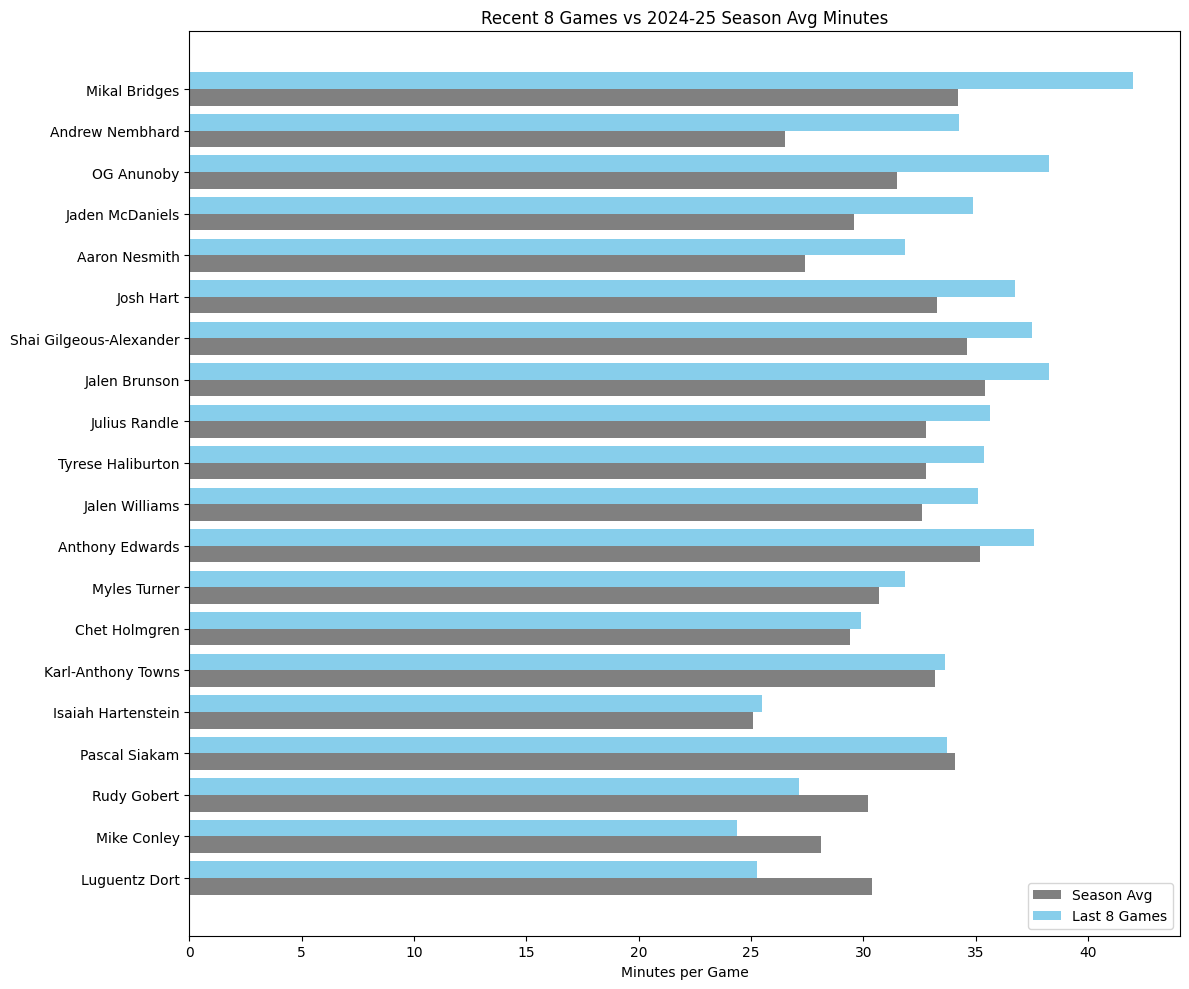

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 선수별 최근 8경기 평균 vs 정규시즌 평균 출전 시간 막대그래프
plt.figure(figsize=(12, 10))
df_plot = final_df.sort_values(by='Δ Minutes', ascending=False)

# 막대 그래프 그리기
bar_width = 0.4
x = range(len(df_plot))

plt.barh([i + bar_width for i in x], df_plot['2024-25 Season Avg Minutes'], height=bar_width, label='Season Avg', color='gray')
plt.barh(x, df_plot['Recent Avg Minutes'], height=bar_width, label='Last 8 Games', color='skyblue')

plt.yticks([i + bar_width / 2 for i in x], df_plot['Player'])
plt.xlabel('Minutes per Game')
plt.title('Recent 8 Games vs 2024-25 Season Avg Minutes')
plt.legend()
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


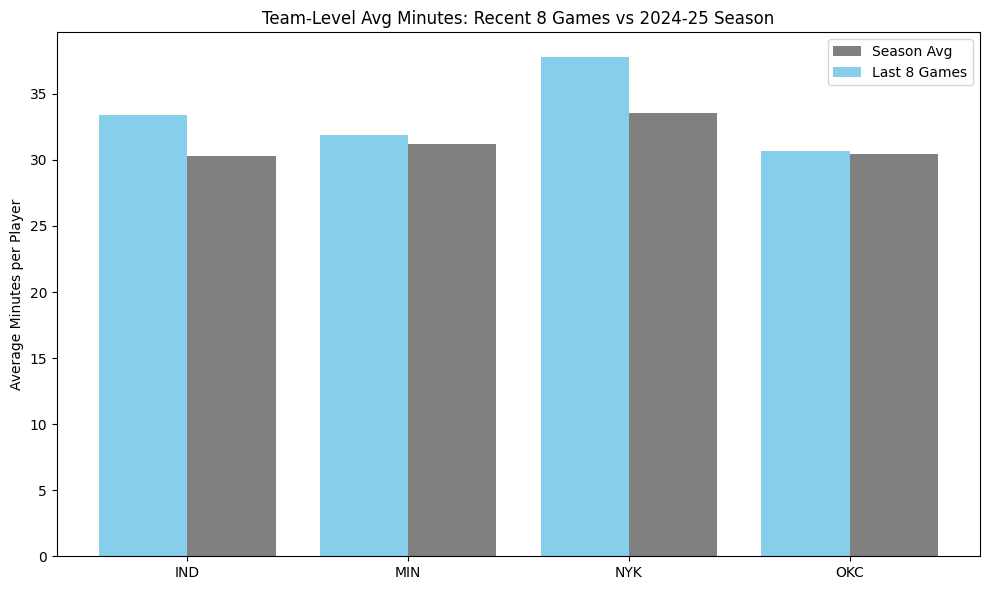

In [ ]:
# 팀별 평균 출전 시간과 평균 증감 계산
team_avg_summary = final_df.groupby('Team').agg({
    'Recent Avg Minutes': 'mean',
    '2024-25 Season Avg Minutes': 'mean',
    'Δ Minutes': 'mean'
}).round(2).reset_index()

# 시각화: 팀별 평균 출전 시간 비교
plt.figure(figsize=(10, 6))
x = range(len(team_avg_summary))

bar_width = 0.4
plt.bar([i + bar_width for i in x], team_avg_summary['2024-25 Season Avg Minutes'],
        width=bar_width, label='Season Avg', color='gray')
plt.bar(x, team_avg_summary['Recent Avg Minutes'],
        width=bar_width, label='Last 8 Games', color='skyblue')

plt.xticks([i + bar_width / 2 for i in x], team_avg_summary['Team'])
plt.ylabel('Average Minutes per Player')
plt.title('Team-Level Avg Minutes: Recent 8 Games vs 2024-25 Season')
plt.legend()
plt.tight_layout()
plt.show()


팀별 쿼터당 특점

In [ ]:
from nba_api.stats.endpoints import LeagueGameFinder, BoxScoreSummaryV2
import pandas as pd
import time

# 팀 ID 매핑
teams = {
    'MIN': 1610612750,
    'OKC': 1610612760,
    'IND': 1610612754,
    'NYK': 1610612752
}

results = []

for abbr, team_id in teams.items():
    print(f"Fetching for {abbr}...")

    finder = LeagueGameFinder(team_id_nullable=team_id,
                              season_nullable='2024-25',
                              season_type_nullable='Playoffs')

    games = finder.get_data_frames()[0]
    recent_games = games.sort_values('GAME_DATE', ascending=False).head(3)

    for _, row in recent_games.iterrows():
        game_id = row['GAME_ID']
        game_date = row['GAME_DATE']

        summary = BoxScoreSummaryV2(game_id=game_id)
        linescore = summary.line_score.get_data_frame()
        team_row = linescore[linescore['TEAM_ID'] == team_id]

        if team_row.empty:
            continue

        results.append({
            'Team': abbr,
            'Date': game_date,
            'Q1': team_row.iloc[0]['PTS_QTR1'],
            'Q2': team_row.iloc[0]['PTS_QTR2'],
            'Q3': team_row.iloc[0]['PTS_QTR3'],
            'Q4': team_row.iloc[0]['PTS_QTR4'],
            'OT': team_row.iloc[0].get('PTS_OT1', None),
            'Total': team_row.iloc[0]['PTS']
        })

        time.sleep(1)  # rate limit 대응

# 결과 정리
df_quarters = pd.DataFrame(results).sort_values(by=['Team', 'Date'], ascending=[True, False])
df_quarters.reset_index(drop=True, inplace=True)
df_quarters


Fetching for MIN...
Fetching for OKC...
Fetching for IND...
Fetching for NYK...


,Team,Date,Q1,Q2,Q3,Q4,OT,Total
0,IND,2025-05-23,24,25,32,33,0,114
1,IND,2025-05-21,34,28,25,38,13,138
2,IND,2025-05-13,19,33,33,29,0,114
3,MIN,2025-05-24,34,38,35,36,0,143
4,MIN,2025-05-22,25,25,21,32,0,103
5,MIN,2025-05-20,23,25,18,22,0,88
6,NYK,2025-05-23,26,26,29,28,0,109
7,NYK,2025-05-21,36,33,21,35,10,135
8,NYK,2025-05-16,26,38,28,27,0,119
9,OKC,2025-05-24,14,27,29,31,0,101


1쿼터 : 뉴욕 (Q1 평균 29.3) → 초반 분위기 주도

3쿼터: 오클라호마 (Q3 평균 32.0)

4쿼터: 인디애나, 뉴욕, OKC 모두 30+ 유지

1쿼터와 4쿼터 비교
(경기 초반대비 후반 집중력,체력 비교,각 팀별 초,후반중 어디에 더 중점을 두는가 비교 가능)

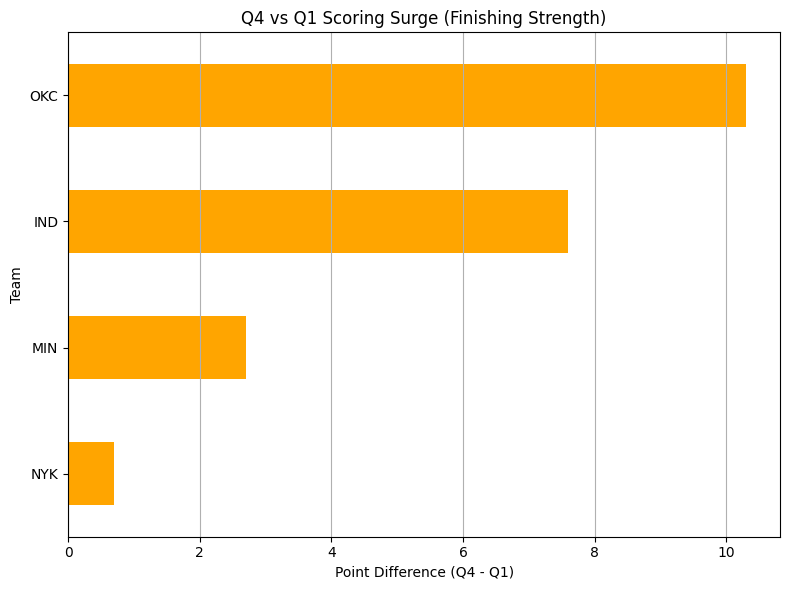

In [ ]:
# 다시 quarter_avg 생성
# 팀별 평균 쿼터 득점 계산
quarter_avg = df_quarters.groupby('Team')[['Q1', 'Q2', 'Q3', 'Q4', 'OT']].mean().round(1)
quarter_avg['Total Avg'] = df_quarters.groupby('Team')['Total'].mean().round(1)

# Q4 - Q1 변화량
quarter_avg['Finish Surge'] = (quarter_avg['Q4'] - quarter_avg['Q1']).round(1)

# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
quarter_avg['Finish Surge'].sort_values().plot(kind='barh', color='orange')
plt.title('Q4 vs Q1 Scoring Surge (Finishing Strength)')
plt.xlabel('Point Difference (Q4 - Q1)')
plt.ylabel('Team')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


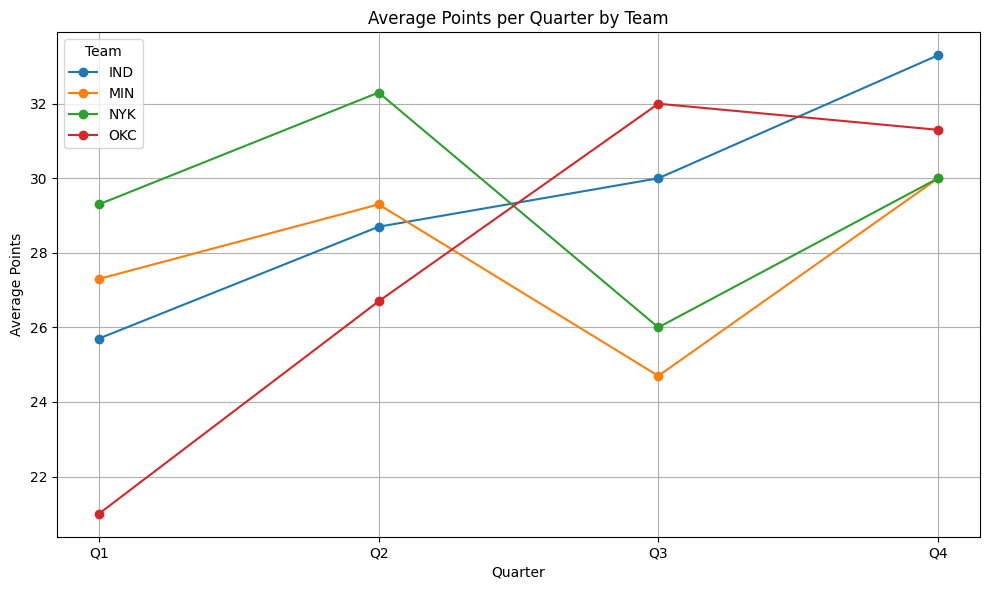

In [ ]:
# 팀별 Q1~Q4 평균만 추출
team_quarters = df_quarters.groupby('Team')[['Q1', 'Q2', 'Q3', 'Q4']].mean().round(1)

# 선그래프: 팀별 쿼터 득점 평균 비교
plt.figure(figsize=(10, 6))
for team in team_quarters.index:
    plt.plot(team_quarters.columns, team_quarters.loc[team], marker='o', label=team)

plt.title('Average Points per Quarter by Team')
plt.xlabel('Quarter')
plt.ylabel('Average Points')
plt.legend(title='Team')
plt.grid(True)
plt.tight_layout()
plt.show()
